# Machine Learning Engineer Nanodegree - Capstone Project 

## Give Me Some Credit

Financial distress is the term used in corporate finance to indicate a condition when business, household, or individual runs into a tight cash situation and cannot pay the owed amount to creditor on a due date.  Financial institutions use a credit scoring algorithm, which determines  what is the probability of credit default. 
Machine learning techniques can be an important tool for financial risk management.<br>
Predictive machine learning models are able to predict the probability of credit default could reduce the risk for credit originators. Better credit score systems could lead to lower overall borrowing costs. This could benefit both lenders and borrowers.<br>
The data that is being used to predict the somebody will experience financial distress will be used from Kaggle competition website __[Give Me Some Credit - data](https://www.kaggle.com/c/GiveMeSomeCredit/data)__. 


In [1]:
#import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
# read the training data 
training_data = pd.read_csv('data/cs-training.csv').drop('Unnamed: 0', axis = 1)
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Feature and Data exploration

### Features

__SeriousDlqin2yrs__ : Person experienced 90 days past due delinquency or worse. <br>
__RevolvingUtilizationOfUnsecuredLines__ : 	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits. <br>
__age__ : 	Age of borrower in years. <br>
__NumberOfTime30-59DaysPastDueNotWorse__ : 	Number of times borrower has been 30-59 days past due but no worse in the last 2 years. <br>
__DebtRatio__ : 	Monthly debt payments, alimony,living costs divided by monthy gross income. <br>
__MonthlyIncome__ : 	Monthly income <br>
__NumberOfOpenCreditLinesAndLoans__ : 	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) <br>
__NumberOfTimes90DaysLate__ : 	Number of times borrower has been 90 days or more past due. <br>
__NumberRealEstateLoansOrLines__ : 	Number of mortgage and real estate loans including home equity lines of credit <br>
__NumberOfTime60-89DaysPastDueNotWorse__ : 	Number of times borrower has been 60-89 days past due but no worse in the last 2 years. <br>
__NumberOfDependents__ : 	Number of dependents in family excluding themselves (spouse, children etc.) <br>

In [3]:

training_data.columns = map(lambda x : x.replace('-', ''), training_data.columns)
training_data.columns.tolist()


['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime3059DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime6089DaysPastDueNotWorse',
 'NumberOfDependents']

### Exploring and Preprocessing the Data

Look at the data and go through the each feature set. Clean up any data there are any outlier.

In [4]:
# describe the data to look at min, max, mean, st dev of each feature
training_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
# count the number of missing data is each features
training_data.apply(lambda x: sum(x.isnull()),axis=0) 

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime3059DaysPastDueNotWorse         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime6089DaysPastDueNotWorse         0
NumberOfDependents                       3924
dtype: int64

#### SeriousDlqin2yrs

Determining occurrence of "SeriousDlqin2yrs", which is a target variable in provided dataset to check how balanced the dataset is? 

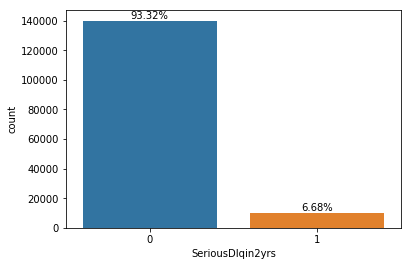

In [6]:

def annotateCount(ax): 
       for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.2f}%'.format(100.*y/len(training_data)), (x.mean(), y), ha='center', va='bottom')
ax=sns.countplot(x = training_data.SeriousDlqin2yrs)
annotateCount(ax)                
plt.show()

#### RevolvingUtilizationOfUnsecuredLines

The max value seems to be outlier as it is off from min, 25%, 50% and 75%  by a much. Replacing outlier value greater than 2 with 2 will not change the data. 

In [7]:
training_data.RevolvingUtilizationOfUnsecuredLines = np.where(training_data.RevolvingUtilizationOfUnsecuredLines > 2, 2.0,training_data.RevolvingUtilizationOfUnsecuredLines)
training_data.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          0.324490
std           0.364699
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max           2.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### Age
The min value seems to be outlier and will be it with the next minimum value which is 21.  

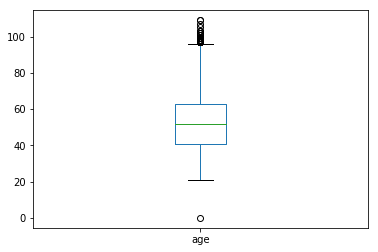

In [8]:
training_data.age.plot.box()

In [9]:
training_data.age = np.where(training_data.age == 0, 21, training_data.age)
training_data.age.describe()

count    150000.000000
mean         52.295347
std          14.771470
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

#### NumberOfTime30-59DaysPastDueNotWorse
There seems to be few outlier. The min, 25%, 50% and 75% data is 0 and so is the median. Replacing the outlier with the max value after outlier is ignored will not have any impact on the final prediction.

In [10]:
training_data.NumberOfTime3059DaysPastDueNotWorse = np.where(training_data.NumberOfTime3059DaysPastDueNotWorse > 13 , 13,training_data.NumberOfTime3059DaysPastDueNotWorse)
training_data.NumberOfTime3059DaysPastDueNotWorse.describe()

count    150000.000000
mean          0.268667
std           0.881603
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: NumberOfTime3059DaysPastDueNotWorse, dtype: float64

#### DebtRatio
There seems to be few outlier as the max is 329664.00 which is much greater than median and 75%.Replacing outlier value greater than 2 with 2 will not change the data.

In [11]:
training_data.DebtRatio = np.where(training_data.DebtRatio > 2, 2.0,training_data.DebtRatio)
training_data.DebtRatio.describe()

count    150000.000000
mean          0.682428
std           0.722898
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max           2.000000
Name: DebtRatio, dtype: float64

#### MonthlyIncome

There are 29731 missing value for monthly income. So, replcaing them with median.

In [12]:
training_data.MonthlyIncome.fillna(training_data.MonthlyIncome.median(), inplace=True)
training_data.MonthlyIncome.describe()

count    1.500000e+05
mean     6.418455e+03
std      1.289040e+04
min      0.000000e+00
25%      3.903000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

#### NumberOfOpenCreditLinesAndLoans

The max is 58, whereas the number of open credit line and loan open more than 30 decreases sigfincant. Replacing anything more than 30 by 30 will not impact the final prediction. 

In [13]:
training_data.NumberOfOpenCreditLinesAndLoans = np.where(training_data.NumberOfOpenCreditLinesAndLoans > 30 , 30,training_data.NumberOfOpenCreditLinesAndLoans)
training_data.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.438793
std           5.070728
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

#### NumberOfTimes90DaysLate
The max is 98, whereas the median and 75% is 0. The data has 98 and 96 as value, whicg seems to be outlier. Replcaing them with 17 which is the max after removing outlier.

In [14]:
training_data.NumberOfTimes90DaysLate = np.where(training_data.NumberOfTimes90DaysLate > 17 , 17,training_data.NumberOfTimes90DaysLate)
training_data.NumberOfTimes90DaysLate.describe()

count    150000.00000
mean          0.12078
std           0.86439
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          17.00000
Name: NumberOfTimes90DaysLate, dtype: float64

#### NumberRealEstateLoansOrLines
The max is 58, whereas the number of open credit line and loan open more than 17 decreases sigfincant. Replacing anything more than 17 by 17 will not impact the final prediction. 

In [15]:
training_data.NumberRealEstateLoansOrLines = np.where(training_data.NumberRealEstateLoansOrLines > 17 , 17,training_data.NumberRealEstateLoansOrLines)
training_data.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          1.017407
std           1.111560
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          17.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

#### NumberOfTime6089DaysPastDueNotWorse

The max is 98, whereas the median and 75% is 0. The data has 98 and 96 as value, whicg seems to be outlier. Replcaing them with 11  which is the max after removing outlier.

In [16]:
training_data.NumberOfTime6089DaysPastDueNotWorse = np.where(training_data.NumberOfTime6089DaysPastDueNotWorse > 11 , 11,training_data.NumberOfTime6089DaysPastDueNotWorse)
training_data.NumberOfTime6089DaysPastDueNotWorse.describe()

count    150000.000000
mean          0.084433
std           0.568166
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: NumberOfTime6089DaysPastDueNotWorse, dtype: float64

#### NumberOfDependents

There are 3924 missing value for monthly income. So, replacing them with median.

In [17]:
training_data.NumberOfDependents.fillna(training_data.NumberOfDependents.median(), inplace=True)
training_data.NumberOfDependents.describe()

count    150000.000000
mean          0.737413
std           1.107021
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

## Shuffle and Split Data
Now all features variables have been converted into numerical features. As always, we will now split the data (both features and their labels) into training and test sets. 70% of the data will be used for training and 30% for testing.

In [18]:
from sklearn.model_selection import train_test_split
from collections import Sequence

X = training_data.drop('SeriousDlqin2yrs', axis=1)
y = training_data.SeriousDlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 105000 samples.
Testing set has 45000 samples.


## Evaluating Model Performance

In this section, I will investigate five different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised binary classification (random forests, bayesian networks, and logistic regression ), and the fourth and fifth algorithm are modern trusted XGBoost and fast LightGBM algorithms.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, auc, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score
import random
import datetime as dt
import xgboost as xgb
import lightgbm as lgb
from scipy.spatial.distance import euclidean
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

/Users/rabin/anaconda3/envs/udacity-capstone/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
def plot_roc(name, y_test, y_pred_prob_test):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()
    
def display_classification_report(y_test, y_predicted_test):
    print(classification_report(y_test, y_predicted_test))

    
def display_accuracy_report_plot(name, model,  X_train, X_test, y_train, y_test):  
    # Train and Test Accuracy
    print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
    print ("Test Accuracy  : ", accuracy_score(y_test, model.predict(X_test)))

    display_classification_report(y_test, model.predict(X_test))   
    plot_roc (name, y_test, model.predict_proba(X_test)[:, 1])

### RANDOMFOREST

Train Accuracy :  0.9907619047619047
Test Accuracy  :  0.9324444444444444
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     41982
          1       0.49      0.16      0.24      3018

avg / total       0.91      0.93      0.92     45000



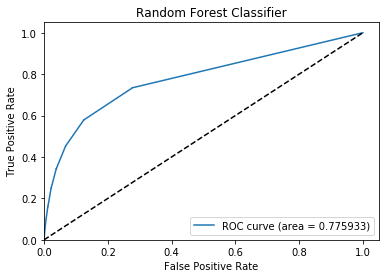

In [21]:
rf_Model = RandomForestClassifier()
rf_Model.fit(X_train, y_train)
rf_Model.score(X_test, y_test)    

display_accuracy_report_plot("Random Forest Classifier", rf_Model,  X_train, X_test, y_train, y_test)


### GaussianNB

Train Accuracy :  0.9308857142857143
Test Accuracy  :  0.9316888888888889
             precision    recall  f1-score   support

          0       0.95      0.98      0.96     41982
          1       0.48      0.27      0.35      3018

avg / total       0.92      0.93      0.92     45000



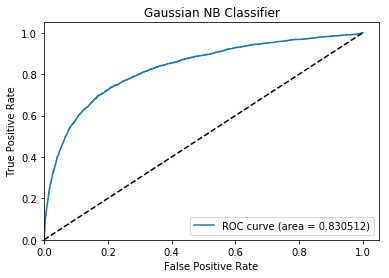

In [22]:
nb_Model = GaussianNB()
nb_Model.fit(X_train, y_train)
nb_Model.score(X_test, y_test)  


display_accuracy_report_plot("Gaussian NB Classifier", nb_Model,  X_train, X_test, y_train, y_test)

### Logistic Regression 

### XGBoost

Start time:  2018-07-13 23:19:56.097895
[0]	train-auc:0.853976	eval-auc:0.839826
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.860156	eval-auc:0.846716
[2]	train-auc:0.861984	eval-auc:0.847803
[3]	train-auc:0.866999	eval-auc:0.852187
[4]	train-auc:0.868201	eval-auc:0.852912
[5]	train-auc:0.869729	eval-auc:0.853914
[6]	train-auc:0.870762	eval-auc:0.854421
[7]	train-auc:0.871974	eval-auc:0.854598
[8]	train-auc:0.87321	eval-auc:0.855358
[9]	train-auc:0.873861	eval-auc:0.855414
[10]	train-auc:0.875113	eval-auc:0.855879
[11]	train-auc:0.875428	eval-auc:0.855633
[12]	train-auc:0.876092	eval-auc:0.855963
[13]	train-auc:0.876342	eval-auc:0.856078
[14]	train-auc:0.877475	eval-auc:0.856212
[15]	train-auc:0.877683	eval-auc:0.85604
[16]	train-auc:0.878646	eval-auc:0.856223
[17]	train-auc:0.879735	eval-auc:0.856402
[18]	train-auc:0.880837	eval-auc:0.856499
[19]	train-auc:0.881257	eval-auc:

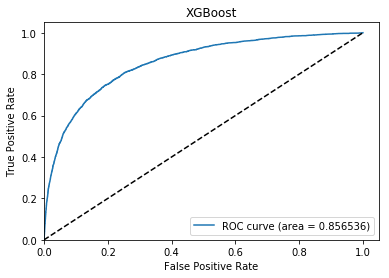

In [23]:
params = {
        'eval_metric': 'auc'
    }
num_boost_round = 50
early_stopping_rounds = 20
test_size = 0.1

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'eval')]

start_time = dt.datetime.now()
print("Start time: ",start_time)
xgb_gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
                    early_stopping_rounds=early_stopping_rounds,
                    verbose_eval=True)
print("Time took to train: ", dt.datetime.now()-start_time)

prediction = xgb_gbm.predict(xgb.DMatrix(X_test), ntree_limit=xgb_gbm.best_iteration+1)


print ("Test Accuracy  : ", accuracy_score(y_test, prediction.round()))

display_classification_report(y_test, prediction.round())
plot_roc ("XGBoost", y_test, prediction)

### LightGBM

Start time:  2018-07-13 23:19:59.475454
[1]	valid_0's auc: 0.837254
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.843714
[3]	valid_0's auc: 0.844326
[4]	valid_0's auc: 0.847415
[5]	valid_0's auc: 0.848166
[6]	valid_0's auc: 0.850472
[7]	valid_0's auc: 0.851162
[8]	valid_0's auc: 0.851638
[9]	valid_0's auc: 0.851325
[10]	valid_0's auc: 0.851538
[11]	valid_0's auc: 0.852024
[12]	valid_0's auc: 0.853584
[13]	valid_0's auc: 0.853921
[14]	valid_0's auc: 0.854307
[15]	valid_0's auc: 0.854539
[16]	valid_0's auc: 0.854604
[17]	valid_0's auc: 0.854649
[18]	valid_0's auc: 0.855034
[19]	valid_0's auc: 0.855361
[20]	valid_0's auc: 0.855955
[21]	valid_0's auc: 0.85609
[22]	valid_0's auc: 0.856314
[23]	valid_0's auc: 0.856615
[24]	valid_0's auc: 0.856942
[25]	valid_0's auc: 0.857108
[26]	valid_0's auc: 0.857383
[27]	valid_0's auc: 0.857512
[28]	valid_0's auc: 0.857944
[29]	valid_0's auc: 0.858129
[30]	valid_0's auc: 0.858361
[31]	valid_0's auc: 0.85845
[32]	valid

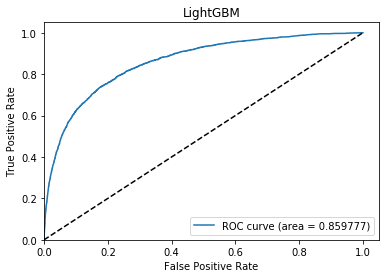

In [24]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
}
num_boost_round=50
early_stopping_rounds=20

start_time = dt.datetime.now()
print("Start time: ",start_time)
lgb_gbm = lgb.train(params,
                lgb_train,
                num_boost_round,    
                valid_sets=lgb_eval,
                early_stopping_rounds=early_stopping_rounds)
print("Time took to train: ", dt.datetime.now()-start_time)

prediction = lgb_gbm.predict(X_test).ravel()

print ("Test Accuracy  : ", accuracy_score(y_test, prediction.round()))
display_classification_report(y_test, prediction.round())
plot_roc ("LightGBM", y_test, prediction)

Start time:  2018-07-13 23:20:00.342855
[1]	valid_0's auc: 0.83946
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.842949
[3]	valid_0's auc: 0.846325
[4]	valid_0's auc: 0.851268
[5]	valid_0's auc: 0.852724
[6]	valid_0's auc: 0.853203
[7]	valid_0's auc: 0.853677
[8]	valid_0's auc: 0.855387
[9]	valid_0's auc: 0.855954
[10]	valid_0's auc: 0.855916
[11]	valid_0's auc: 0.856066
[12]	valid_0's auc: 0.856386
[13]	valid_0's auc: 0.856798
[14]	valid_0's auc: 0.856901
[15]	valid_0's auc: 0.857431
[16]	valid_0's auc: 0.857644
[17]	valid_0's auc: 0.858232
[18]	valid_0's auc: 0.858507
[19]	valid_0's auc: 0.858658
[20]	valid_0's auc: 0.858914
[21]	valid_0's auc: 0.859137
[22]	valid_0's auc: 0.859257
[23]	valid_0's auc: 0.859417
[24]	valid_0's auc: 0.859583
[25]	valid_0's auc: 0.859543
[26]	valid_0's auc: 0.85983
[27]	valid_0's auc: 0.859926
[28]	valid_0's auc: 0.860069
[29]	valid_0's auc: 0.860202
[30]	valid_0's auc: 0.86032
[31]	valid_0's auc: 0.860332
[32]	valid_

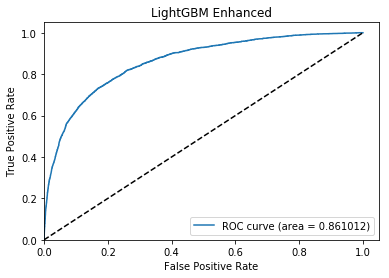

In [25]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric':  'auc',
    'learning_rate': 0.15,
    'feature_fraction': 0.8,
    'lambda_l1': 5,
    'lambda_l2': 10,
    'min_gain_to_split': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 5,
    'max_depth' : 14
    }
num_boost_round=500
early_stopping_rounds=20

start_time = dt.datetime.now()
print("Start time: ",start_time)
lgb_gbm = lgb.train(params,
                lgb_train,
                num_boost_round,    
                valid_sets=lgb_eval,
                early_stopping_rounds=early_stopping_rounds)
print("Time took to train: ", dt.datetime.now()-start_time)

prediction = lgb_gbm.predict(X_test).ravel()

print ("Test Accuracy  : ", accuracy_score(y_test, prediction.round()))
display_classification_report(y_test, prediction.round())
plot_roc ("LightGBM Enhanced", y_test, prediction)

### Feature Importance


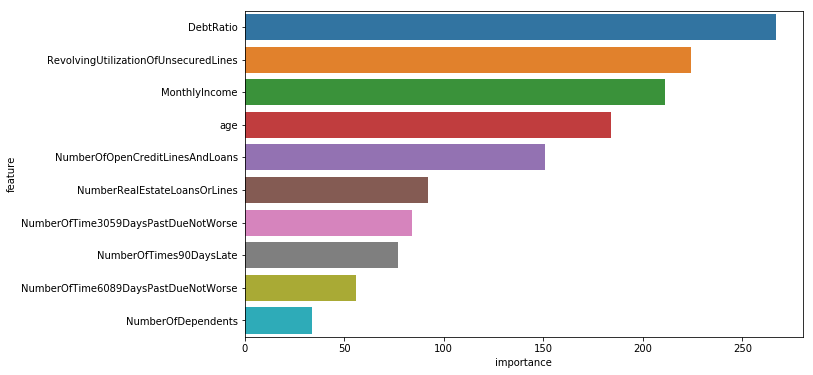

In [26]:
imp = pd.DataFrame()
imp['feature'] = X_train.columns
imp['importance'] = lgb_gbm.feature_importance()
imp = imp.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", 
            data=imp)
plt.show();

### Plot the Precision-Recall curve

In [27]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    cv = StratifiedKFold(y, n_folds=nfolds)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = lgb_gbm.predict(X.iloc[test])
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()


    plt.show()



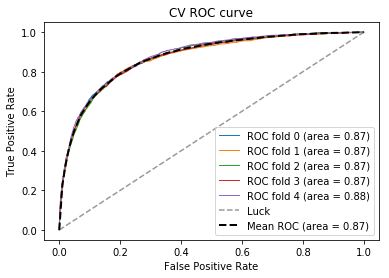

In [28]:
plotCvRocCurve(X, y, lgb_gbm)

In [29]:
def rocZeroOne(y_test, y_predicted_porba):
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted_porba)
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print ('Best point on the ROC: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print ( 'Best Cut-Off point: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
   

Best point on the ROC: TPR = 77.535%, FPR = 21.524%
Best Cut-Off point: 0.0628


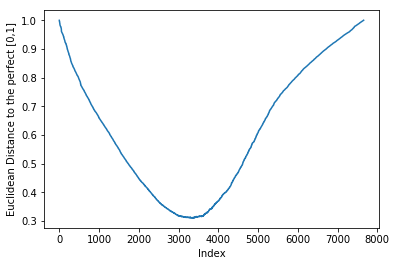

In [30]:
rocZeroOne(y_test, prediction)

### Confusion matrix

In [31]:
def plot_confusion_matrix(y_test, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    
    print ('Classification Report:')
    print (classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(y_test.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    print ('\n','Confusion matrix, without normalization: ','\n')
    print (cm)
    plot_confusion_matrix_plot(cm=cm)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n','Normalized confusion matrix','\n',)
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')

def makePredThresh(prediction, thr = 0.5):
    final = []
    for p in prediction:
        if p >= thr:
            final.append(1)
        else:
            final.append(0)
    
    return final

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.79      0.87     41982
          1       0.21      0.77      0.33      3018

avg / total       0.93      0.79      0.84     45000


 Confusion matrix, without normalization:  

[[33075  8907]
 [  691  2327]]

 Normalized confusion matrix 

[[0.78783764 0.21216236]
 [0.22895958 0.77104042]]


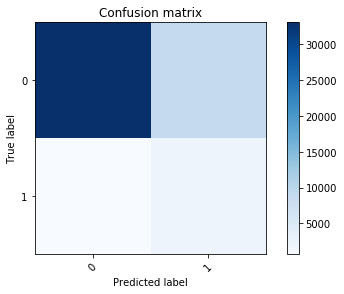

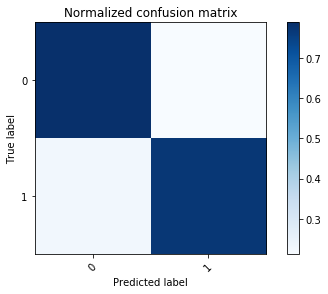

In [32]:

pred = makePredThresh(prediction, thr=0.0638)
plot_confusion_matrix(y_test, pred)

## Read the testing data and export the prediction

The testing data needs to be read and then processed to clean the outlier and then use the selected model to predict. and generate the prediction. The Auccuracy of XGBoost and LightGBM seems to be almost same wheras the speed to train 50 rounds with LightGBM is 5X faster than XGBoost. LightGBM will be ny selected model to use to predit the test data.

In [33]:
test_data = pd.read_csv('data/cs-test.csv')
index = test_data['Unnamed: 0']
testing_data = test_data.drop('Unnamed: 0', axis = 1)
testing_data.columns = map(lambda x : x.replace('-', ''), testing_data.columns)
testing_data.columns.tolist()

# clean the Outlier as above with the testing data

#RevolvingUtilizationOfUnsecuredLines 
testing_data.RevolvingUtilizationOfUnsecuredLines = np.where(testing_data.RevolvingUtilizationOfUnsecuredLines > 2, 2.0,testing_data.RevolvingUtilizationOfUnsecuredLines)

#age
testing_data.age = np.where(testing_data.age == 0, 21, testing_data.age)

#NumberOfTime3059DaysPastDueNotWorse
testing_data.NumberOfTime3059DaysPastDueNotWorse = np.where(testing_data.NumberOfTime3059DaysPastDueNotWorse > 13 , 13,testing_data.NumberOfTime3059DaysPastDueNotWorse)

#Debt Ratio
testing_data.DebtRatio = np.where(testing_data.DebtRatio > 2, 2.0,testing_data.DebtRatio)

#MonthlyIncome
testing_data.MonthlyIncome.fillna(testing_data.MonthlyIncome.median(), inplace=True)

#NumberOfOpenCreditLinesAndLoans
testing_data.NumberOfOpenCreditLinesAndLoans = np.where(testing_data.NumberOfOpenCreditLinesAndLoans > 30 , 30,testing_data.NumberOfOpenCreditLinesAndLoans)

#NumberOfTimes90DaysLate
testing_data.NumberOfTimes90DaysLate = np.where(testing_data.NumberOfTimes90DaysLate > 17 , 17,testing_data.NumberOfTimes90DaysLate)

#NumberRealEstateLoansOrLines
testing_data.NumberRealEstateLoansOrLines = np.where(testing_data.NumberRealEstateLoansOrLines > 17 , 17,testing_data.NumberRealEstateLoansOrLines)

#NumberOfTime6089DaysPastDueNotWorse
testing_data.NumberOfTime6089DaysPastDueNotWorse = np.where(testing_data.NumberOfTime6089DaysPastDueNotWorse > 11 , 11,testing_data.NumberOfTime6089DaysPastDueNotWorse)

#NumberOfDependents
testing_data.NumberOfDependents.fillna(testing_data.NumberOfDependents.median(), inplace=True)

testing_data = testing_data.drop('SeriousDlqin2yrs', axis=1)
testing_data.head()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


### Predict testing data with select LightGBM


In [34]:
test_prediction = lgb_gbm.predict(testing_data).ravel()

submission = pd.DataFrame({ 'Id': index,
                            'Probability': test_prediction })
submission.to_csv("submission.csv", index=False)